**PROBABILITY FOR DATA SCIENCE: Project 3, Random Assignment Problem**

**NAME:** Letizia 

**SURNAME:** Lanza 

**ID:** VR502321

**ABSTRACT:** the random assignment problem consists of allocating *n* jobs to an equal number of machines to minimize a random total cost. We aim to estimate the expected cost value associated with the optimal solution.

**OBJECTIVES:** minimize the total cost A*n* for a given *n* x *n* cost matrix *C* with independent and identically distributed random variables with distribution U(0, 1) and also estimate the expected cost value E(A*n*) as *n* grows large. 

**Step 1:** generate the cost matrix

Generate an *n* x *n* matrix with elements uniformly distributed between 0 and 1. 

In [2]:
#import libraries
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def cost_matrix(n):
    return np.random.uniform(0, 1, (n, n))

**Step 2:** define the total cost function 

Create a function to calculate the total cost for a given permutation of the cost matrix.

In [4]:
def total_cost(cost_matrix, permutation):
    total = 0 #initialize the total cost 
    
    for i in range(len(cost_matrix)):
        total += cost_matrix[i, permutation[i]] #add the cost from cost_matrix at index i, permutation[i] to total
    
    return total 

**Step 3:** implement the Metropolis - Hastings algorithm with history

Write the Metropolis - Hastings algorithm that keeps track of permutations and costs at each step.

In [5]:
def metropolis_hastings_with_history(cost_matrix, beta, initial_permutation, steps):
    n = len(initial_permutation)  #get the length of the permutation (number of elements to permute)
    permutations = [initial_permutation.copy()] #initialize the list of permutations with the initial permutation
    costs = [total_cost(cost_matrix, initial_permutation)] #initialize the list of costs with the cost of the initial permutation
    
    for t in range (1, steps):
        next_permutation = np.random.permutation(n) #generate a new random permutation
        new_cost = total_cost(cost_matrix, next_permutation) #calculate the cost of the new permutation
        acceptance_probability = np.exp(beta * (costs[t - 1] - new_cost)) #calculate the acceptance probability using the Metropolis - Hastings criterion
        
        if(np.random.uniform(0,1) < min(1, acceptance_probability)): 
            permutations.append(next_permutation) #if the permutation is accepted, append the new permutation and its cost to the lists
            costs.append(new_cost)
        else:
            permutations.append(permutations[t - 1]) #if the permutation is not accepted, append the previous permutation and cost to the lists
            costs.append(costs[t - 1])
    
    return permutations, costs

**NEW**

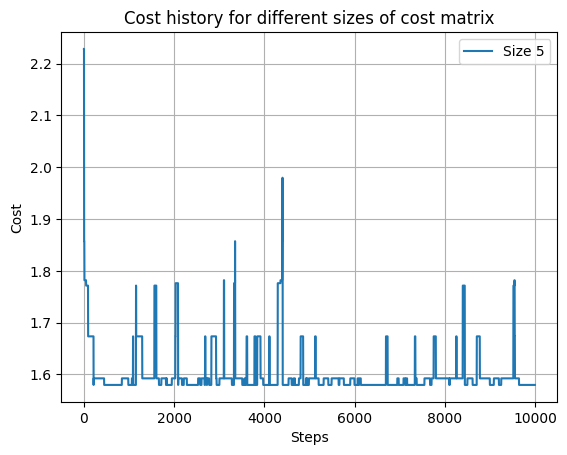

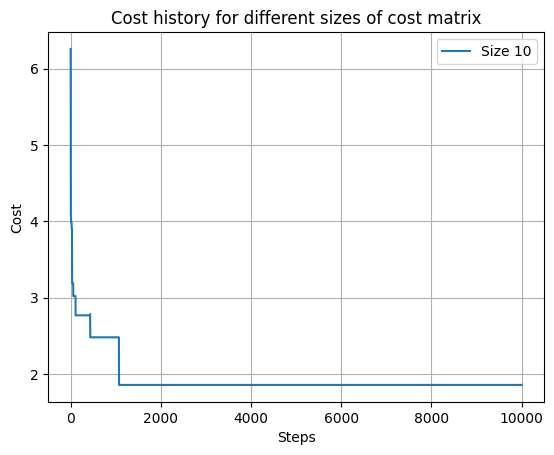

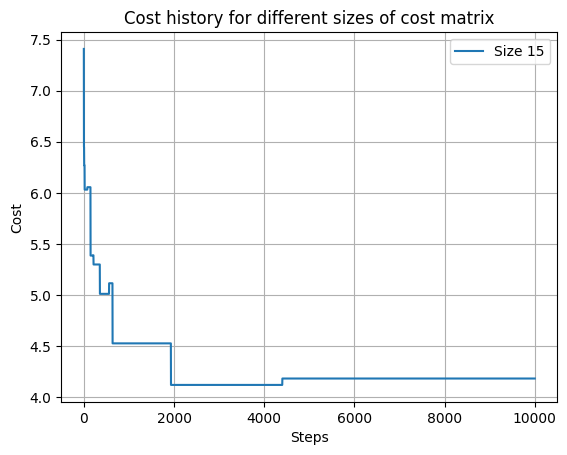

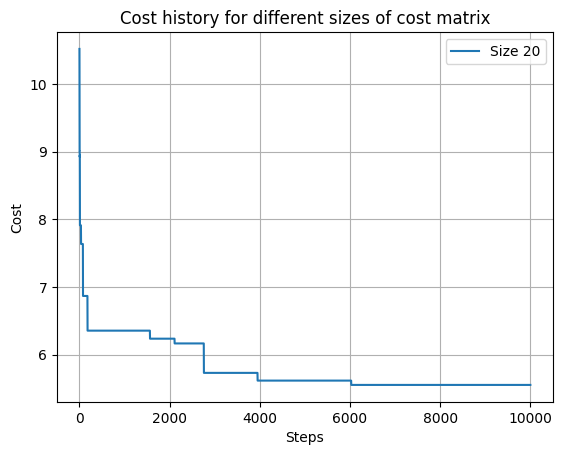

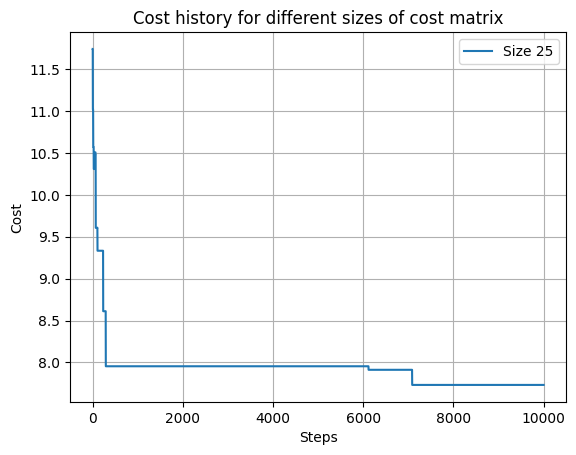

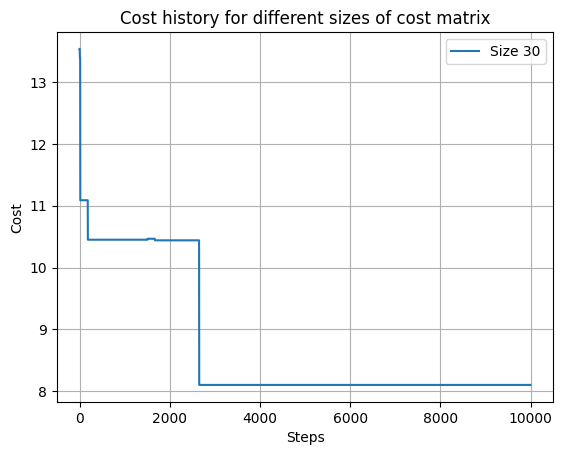

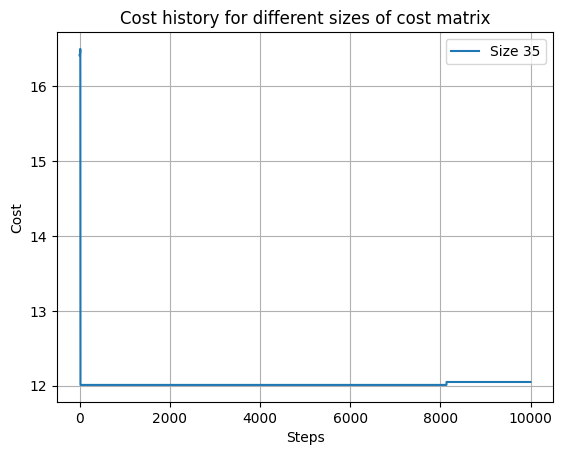

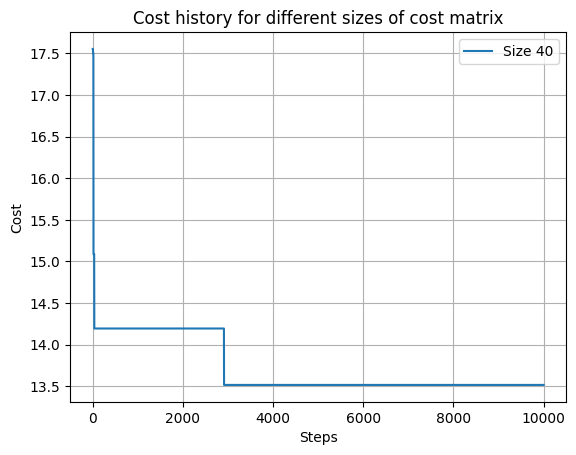

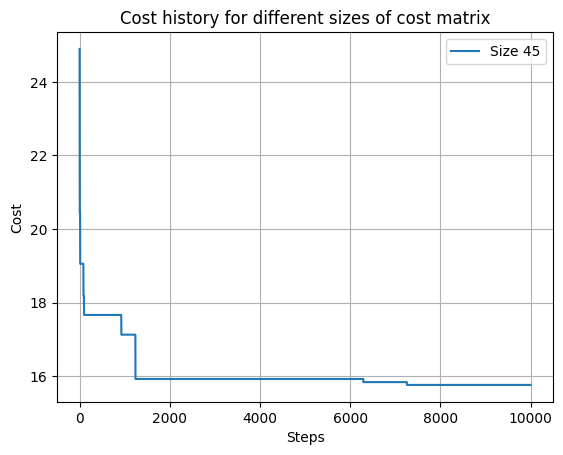

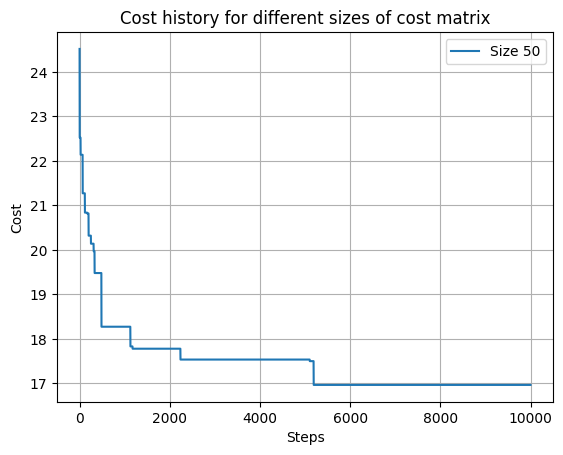

In [6]:
# Define the range of sizes for the cost matrix according to the formula n = 5α
ns = [5 * alpha for alpha in range(1, 11)]
beta = 20  # Beta parameter for the Metropolis-Hastings algorithm
steps = 10000  # Number of steps for each Metropolis-Hastings simulation

# Perform the analysis and plot the results for Metropolis-Hastings with history
for n in ns:
    matrix = cost_matrix(n)  # Generate a cost matrix of size n
    initial_permutation = np.random.permutation(n)  # Generate a random initial permutation of indices from 0 to n - 1
    _, costs = metropolis_hastings_with_history(matrix, beta, initial_permutation, steps)  # Run the Metropolis-Hastings algorithm and obtain the cost history
    plt.plot(range(steps), costs, label=f'Size {n}')
    plt.xlabel('Steps')
    plt.ylabel('Cost')
    plt.title('Cost history for different sizes of cost matrix')
    plt.legend()
    plt.grid(True)
    plt.show()


**Step 4:** simulations for different sizes and visualization of results 

Run simulations for different matrix sizes and visualize the results.

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_2533/3915596675.py:9: RuntimeWarning: overflow encountered in exp
  acceptance_probability = np.exp(beta * (costs[t - 1] - new_cost)) #calculate the acceptance probability using the Metropolis - Hastings criterion


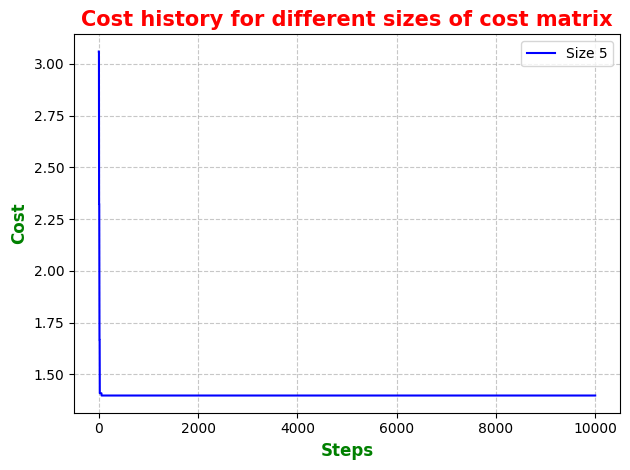

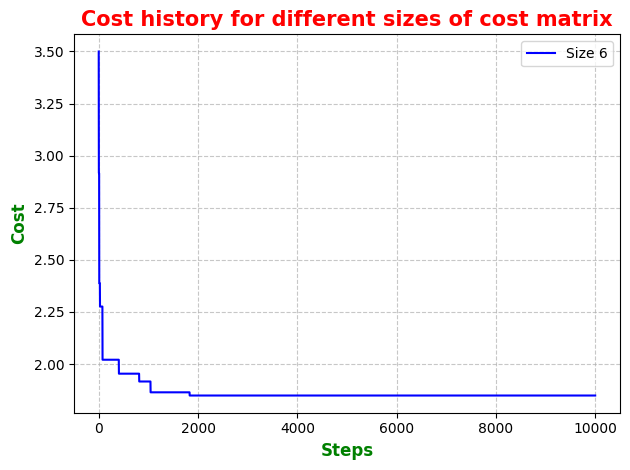

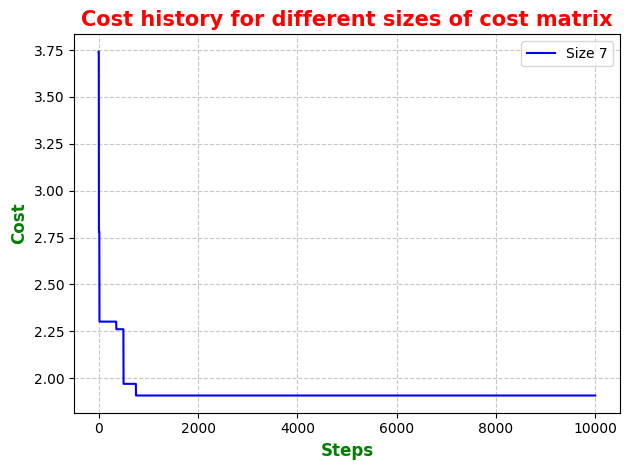

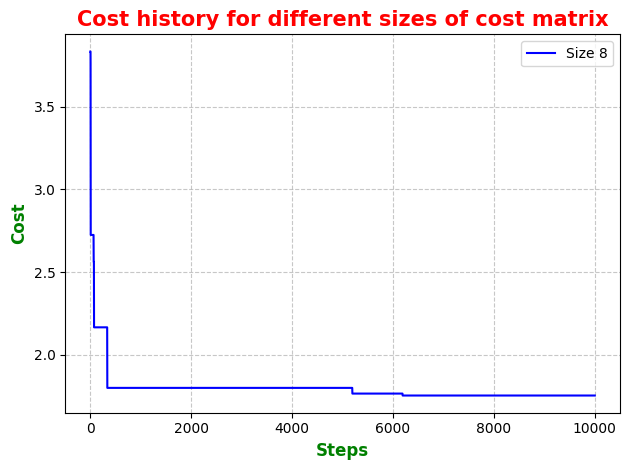

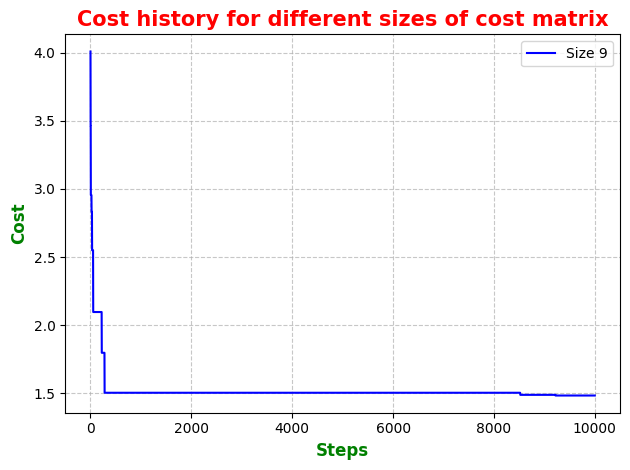

In [23]:
sizes = range(5, 10) #iterate over different sizes of the cost matrix
for n in sizes: 
    steps = 10000 #number of steps for Metropolis - Hastings algorithm
    beta = 10000 #beta parameter for Metropolis - Hastings algorithm
    matrix = cost_matrix(n) #generate a cost matrix for size n
    initial_permutation = np.random.permutation(n) #generate a random initial permutation of indices from 0 to n - 1
    _, y = metropolis_hastings_with_history(matrix, beta, initial_permutation, steps) #execute the Metropolis - Hastings algorithm and obtain the cost history
    
    plt.plot(range(steps), y, label = f'Size {n}', color = 'blue') #plot the cost history for the current size n
    plt.title('Cost history for different sizes of cost matrix', fontweight = 'bold', color = 'red', fontsize = 15) 
    plt.xlabel('Steps', fontweight = 'bold', color = 'green', fontsize = 12) 
    plt.ylabel('Cost', fontweight = 'bold', color = 'green', fontsize = 12) 
    plt.grid(True, linestyle = '--', alpha = 0.7)
    plt.legend() 
    plt.tight_layout()
    plt.show()

**Graph 1 --> cost matrix size = 5:** the cost starts around 3.0 and quickly decreases within the first few steps, reaching a value around 1.5 within the first 1000 steps. Subsequently, the cost stabilizes and remains constant until the end of the 10000 steps.

**Graph 2 --> cost matrix size = 6:** the cost starts around 3.5 and quickly decreases within the first 1000 steps, reaching a value below 2.0. After this rapid decline, the cost continues to gradually drecrease until it stabilizes around 1.5. 

**Graph 3 --> cost matrix size = 7:** the cost starts around 3.75 and quickly decreases within the first 1000 steps, reaching a value below 2.5. After this initial decline, the cost continues to slowly decrease until it stabilizes around 2.0. 

**Graph 4 --> cost matrix size = 8:** the cost starts around 3.0 and quicklu decreases within the first 1000 steps, reaching a value around 1.75. After this initial decline, the cost stabilizes and remains constant until the end of the 10000 steps.

**Graph 5 --> cost matrix size = 9:** the cost starts aroud 4.0 and quickly decreases within the first 1000 steps, reaching a value around 1.5. After this initial decline, the cost stabilizes and reamins constant until the end of the 10000 steps.

**General considerations:** in all graphs, the cost quicklu decreases within the first 1000 steps, indicating that the algorithm effectively finds a solution with a lower cost quickly. These results indicate that the implemented Metropolis - Hastings algorithm is effective and robust for the tested matrix sizes, providing stable and optimal solutions in a relatively short time. 

**Step 5:** implement the Metropolis - Hastings algorithm without history

Implement the Metropolis - Hasting algorithm that only tracks the final permutation and cost.

In [8]:
def metropolis_hastings(cost_matrix, beta, initial_permutation, steps):
    n = len(initial_permutation)
    permutation = initial_permutation.copy()
    cost = total_cost(cost_matrix, initial_permutation) #calculate initial total cost
    
    for t in range(1, steps):
        next_permutation = np.random.permutation(n) #generate a random neighboring permutation
        new_cost = total_cost(cost_matrix, next_permutation) #calculate the total cost of the new permutation
        acceptance_probability = np.exp(beta * (cost - new_cost)) #calculate acceptance probability
       
        if np.random.uniform(0, 1) < min(1, acceptance_probability): #accept or reject the new permutation based on acceptance probability
            permutation = next_permutation
            cost = new_cost
    
    return permutation, cost

**NEW**

In [9]:
steps = 50000  # Number of steps for each Metropolis-Hastings simulation
M = 100  # Number of independent realizations

# Perform the analysis and plot the results for Metropolis-Hastings without history
estimated_costs = []  # List to store estimated costs for each matrix size
for n in ns:
    costs = []
    for _ in range(M):  # Perform M independent realizations for each matrix size
        matrix = cost_matrix(n)  # Generate a cost matrix of size n
        initial_permutation = np.random.permutation(n)  # Generate a random initial permutation of indices from 0 to n - 1
        _, cost = metropolis_hastings(matrix, beta, initial_permutation, steps)  # Run the Metropolis-Hastings algorithm and obtain the best permutation and its cost
        costs.append(cost)  # Store the cost obtained from the Metropolis-Hastings algorithm
    estimated_costs.append(np.mean(costs))  # Calculate the average cost across all realizations for the current matrix size

# Plot the results
plt.plot(ns, estimated_costs, marker='o', linestyle='-', color='b', label='Estimate of E(A_n)')
plt.axhline(y=np.pi**2/6, color='r', linestyle='--', label=r'$\pi^2 / 6$')
plt.xlabel('n')
plt.ylabel('E(A_n)')
plt.title('Estimate of E(A_n) for different matrix sizes')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [10]:
ns = [5 * alpha for alpha in range(1, 11)]
beta = 20  # Beta parameter for the Metropolis-Hastings algorithm
steps = 50000  # Number of steps for each Metropolis-Hastings simulation
M = 100  # Number of independent realizations

# Perform the analysis and plot the results for Metropolis-Hastings without history
estimated_costs = []  # List to store estimated costs for each matrix size
for n in ns:
    costs = []
    for _ in range(M):  # Perform M independent realizations for each matrix size
        matrix = cost_matrix(n)  # Generate a cost matrix of size n
        initial_permutation = np.random.permutation(n)  # Generate a random initial permutation of indices from 0 to n - 1
        _, cost = metropolis_hastings(matrix, beta, initial_permutation, steps)  # Run the Metropolis-Hastings algorithm and obtain the best permutation and its cost
        costs.append(cost)  # Store the cost obtained from the Metropolis-Hastings algorithm
    estimated_costs.append(np.mean(costs))  # Calculate the average cost across all realizations for the current matrix size


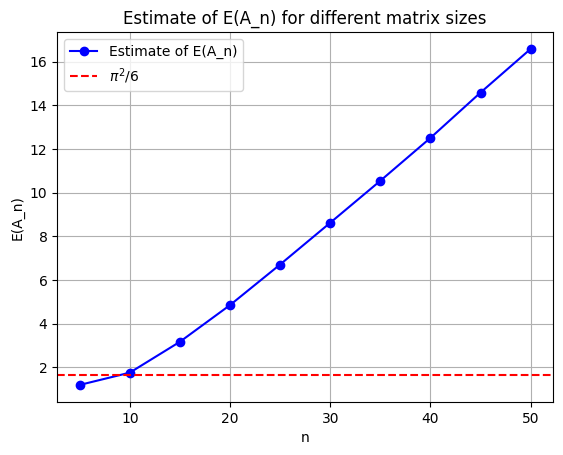

In [11]:
# Plot the results
plt.plot(ns, estimated_costs, marker='o', linestyle='-', color='b', label='Estimate of E(A_n)')
plt.axhline(y=np.pi**2/6, color='r', linestyle='--', label=r'$\pi^2 / 6$')
plt.xlabel('n')
plt.ylabel('E(A_n)')
plt.title('Estimate of E(A_n) for different matrix sizes')
plt.legend()
plt.grid(True)
plt.show()

**Step 6:** estimate E(A*n*) for different sizes of *n*

Run the Metropolis - Hastings algorithm for different sizes of *n* and estimate E(A*n*).

In [25]:
ns = range(5, 10) #define the range of sizes for the cost matrix
beta = 20 #beta parameter for the Metropolis - Hastings algorithm
steps = 50000 #number of steps for each Metropolis - Hastings simulation
M = 100 #number of independent realizations 

estimated_costs = [] #list to store estimated costs for each matrix size
for n in ns:
    costs = []
    
    for _ in range(M): #perform M independent realizations for each matrix size
        matrix = cost_matrix(n) #generate a cost matrix of size n
        initial_permutation = np.random.permutation(n) #generate a random initial permutation of indices from 0 to n - 1
        _, cost = metropolis_hastings(matrix, beta, initial_permutation, steps) #run the Metropolis - Hastings algorithm and obtain the best permutation and its cost
        costs.append(cost) #store the cost obtained from the Metropolis - Hastings algorithm
    estimated_costs.append(np.mean(costs)) #calculate the average cost across all realizations for the current matrix size

**Step 7:** visualization of E(A*n*) estimated

Visualize the results of the E(A*n*) estimated for different sizes of *n*.

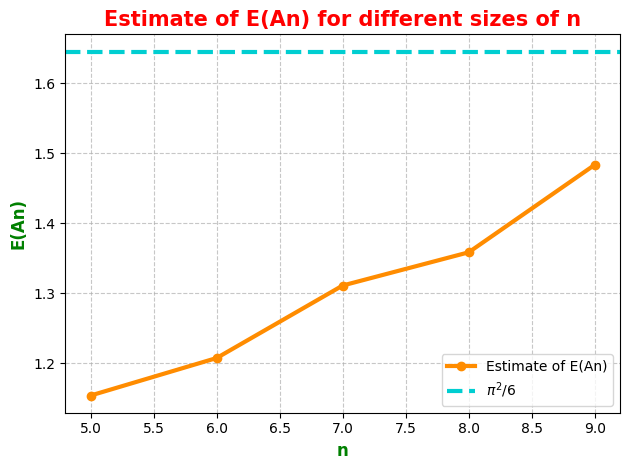

In [37]:
#plot the results
plt.plot(ns, estimated_costs, color = '#FF8C00', linestyle = '-', linewidth = 3, marker = 'o', markersize = 6, label = 'Estimate of E(An)')
plt.axhline(y = np.pi**2 / 6, color = '#00CED1', linestyle = '--', linewidth = 3, label = r'$\pi^2 / 6$')
plt.title('Estimate of E(An) for different sizes of n', fontweight = 'bold', fontsize = 15, color = 'red')
plt.xlabel('n', fontweight = 'bold', color = 'green', fontsize = 12)
plt.ylabel('E(An)', fontweight = 'bold', color = 'green', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.show()